In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

object_location = pd.read_csv('raw_updated.csv')
metadata = pd.read_csv('OL_metadata.csv')
object_location["vidname"] = [
    file.split("/")[-1].split(".")[0] for file in object_location.file]
object_location["genotype"] = "WT"
object_location.loc[object_location.vidname.str.contains(
    "hpc09"), "genotype"] = "TG"
object_location.loc[object_location.vidname.str.contains(
    "hpc10"), "genotype"] = "TG"

object_location["subid"] = "hpc04"
object_location.loc[object_location.vidname.str.contains(
    "hpc05"), "subid"] = "hpc05"
object_location.loc[object_location.vidname.str.contains(
    "hpc06"), "subid"] = "hpc06"
object_location.loc[object_location.vidname.str.contains(
    "hpc07"), "subid"] = "hpc07"
object_location.loc[object_location.vidname.str.contains(
    "hpc09"), "subid"] = "hpc09"
object_location.loc[object_location.vidname.str.contains(
    "hpc10"), "subid"] = "hpc10"

object_location["condition"] = "baseline"
object_location.loc[object_location.vidname.str.contains("test", case = False), "condition"] = "test"

object_location["treatment"] = "none"
object_location["paradigm"] = "baseline"
object_location["visit"] = 0

for i in range(len(metadata)):
    object_location.treatment.loc[object_location.vidname == metadata.vidname[i]] = metadata.treatment[i]
    object_location.paradigm.loc[object_location.vidname == metadata.vidname[i]] = metadata.condition[i]

for i in range(len(metadata)):
    file_idx = object_location.vidname == metadata.vidname[i]
    temp_df = object_location[file_idx]
    temp_df["visit"] = (
        np.arange(np.sum(temp_df.action.str.contains("start")))
        .astype(str)
        .repeat(2))
    object_location.visit.loc[
        object_location.vidname == metadata.vidname[i]] = temp_df.visit.loc[temp_df.vidname == metadata.vidname[i]]

object_location.to_csv('object_location_final.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'raw_updated.csv'

In [8]:
#check for data entry errors
for i in range(len(metadata)):
    if np.sum(object_location.action.loc[
        object_location.vidname == metadata.vidname[i]].str.contains("start")) != len(object_location.action.loc[
        object_location.vidname == metadata.vidname[i]].str.contains("start"))/2:
        print(metadata.vidname[i])

NameError: name 'metadata' is not defined

In [5]:
newOL = object_location.pivot_table(
    object_location,
    index=[
        "file",
        "subid",
        "vidname",
        "genotype",
        "condition",
        "treatment",
        "paradigm",
        "visit"
    ],
    columns=["action"],
).reset_index()
newOL["object1_explore"] = (
    newOL.frame.object1_stop - newOL.frame.object1_start
) / 60
newOL["object2_explore"] = (
    newOL.frame.object2_stop - newOL.frame.object2_start
) / 60

metadata["paradigm"] = metadata.condition
metadata["condition"] = "baseline"
metadata.loc[metadata.vidname.str.contains("test", case = False), "condition"] = "test"
metadata["DI"] = np.nan

for i in range(len(metadata)):
    object1sum = np.sum(newOL.object1_explore.loc[newOL.vidname == metadata.vidname[i]])
    object2sum = np.sum(newOL.object2_explore.loc[newOL.vidname == metadata.vidname[i]])
    metadata.DI[i] = (object2sum - object1sum) / (object2sum + object1sum)

newOL.to_csv('pivot.csv', index = False)
metadata.to_csv('metawithDI.csv', index = False)

NameError: name 'object_location' is not defined

In [4]:
overall = pd.DataFrame({"subid": 
                        ["hpc04", "hpc04", 
                         "hpc06", "hpc06", "hpc07", "hpc07",
                         "hpc09", "hpc09", "hpc10", "hpc10"],
                        "condition":
                        ["base", "test",
                         "base", "test", "base", "test",
                         "base", "test", "base", "test"]})

subids = sorted(set(newOL.subid))
overall["DI"] = np.nan

for i in range(0, len(overall), 2):
    baseidx = np.where((newOL.condition == 'baseline') & (newOL.subid == overall.subid[i]))
    testidx = np.where((newOL.condition == 'test') & (newOL.subid == overall.subid[i]))
    object1base = np.sum(newOL.object1_explore.loc[baseidx])
    object2base = np.sum(newOL.object2_explore.loc[baseidx])
    object1test = np.sum(newOL.object1_explore.loc[testidx])
    object2test = np.sum(newOL.object2_explore.loc[testidx])
    overall.DI.loc[i] = (object2base - object1base) / (object2base + object1base)
    overall.DI.loc[i+1] = (object2test - object1test) / (object2test + object1test)
    
overall

NameError: name 'newOL' is not defined

In [4]:
import pandas as pd
overallOL = pd.DataFrame({"subid": 
                        ["group1_A", "group1_A", "group1_B", "group1_B", "group1_C", "group1_C",
                         "group2_A", "group2_A", "group2_B", "group2_B", "group2_C", "group2_C",
                         "group3_A", "group3_A", "group3_B", "group3_B", "group3_C", "group3_C", "group3_D", "group3_D",
                         "group4_A", "group4_A",
                         "group8_A", "group8_A", "group8_B", "group8_B", "group8_C", "group8_C", "group8_D", "group8_D",
                         "group9_A", "group9_A", "group9_B", "group9_B"],
                        "condition":
                        ["base", "test", "base", "test", "base", "test",
                         "base", "test", "base", "test", "base", "test",
                         "base", "test", "base", "test", "base", "test", "base", "test",
                         "base", "test",
                         "base", "test", "base", "test", "base", "test", "base", "test",
                         "base", "test", "base", "test"],
                        "DR":
                        [-0.31042016806722683, 0.07750117426021598, -0.21986737745416723, 0.07053730583142342, 0.15778977980889047, 0.33069144575020504,
                         0.31349255970989115, 0.4833893243747668, 0.11323725323967529, 0.22282782943251042, -0.3102473498233216, 0.051948051948051986,
                         0.03437313729386052, 0.09734939759036138, -0.12417061611374414, -0.16477272727272724, 0.4827378562826174, 0.04434728294815747, -0.46251256281407044, 0.021477751515774336,
                         -0.16500084702693557, 0.620099392600773,
                         -0.11352762070465415, 0.6067032478125464, -0.03643083421330536, 0.23849579416130645, 0.035624264829440484, 0.10306643952299818, -0.025530539696219285, 0.1451542807475011, 
                         -0.10117126256571043, 0.587696335078534, -0.25148908007941767, 0.0844306738962044]})

overallOL

,subid,condition,DR
0,group1_A,base,-0.310420
1,group1_A,test,0.077501
2,group1_B,base,-0.219867
3,group1_B,test,0.070537
4,group1_C,base,0.157790
5,group1_C,test,0.330691
6,group2_A,base,0.313493
7,group2_A,test,0.483389
8,group2_B,base,0.113237
9,group2_B,test,0.222828


In [32]:
import pandas as pd
cohort1 = pd.DataFrame({"subid": 
                        ["1N", "1N", "2R", "2R", "3B", "3B", "4_2L", "4_2L",
                         "5N", "5N", "6R", "6R", "7B", "7B", "8_2L", "8_2L",
                         "9N", "9N", "10L", "10L", "11R", "11R", "12B", "12B"],
                        "condition":
                        ["base", "test", "base", "test", "base", "test", "base", "test",
                         "base", "test", "base", "test", "base", "test", "base", "test",
                         "base", "test", "base", "test", "base", "test", "base", "test"],
                        "genotype":
                        ["TG", "TG", "WT", "WT", "TG", "TG", "WT", "WT", 
                         "TG", "TG", "WT", "WT", "WT", "WT", "TG", "TG",
                         "TG", "TG", "WT", "WT", "WT", "WT", "TG", "TG"],
                        "DR":
                        [0.010000, 0.159544, 0.192465, 0.010000, 0.233361, 0.137364, -0.241880, -0.091703,
                         0.314853, -0.418432,-0.255638, -0.243450, 0.205010, 0.122792, -0.084767, 0.207614,
                         0.164574, -0.045597, -0.306641, 0.337791, 0.220549, 0.120338, -0.095664, 0.102281],
                        "Totalobjexp":
                        [154.85000000000002, 77.26666666666667, 177.13333333333333, 94.73333333333335, 122.99999999999997, 45.3, 165.5333333333333, 70.19999999999999,
                          219.43333333333328, 80.0, 81.13333333333333, 71.94999999999999, 112.38333333333333, 106.86666666666666, 152.71666666666664, 65.28333333333333,
                        114.54999999999998, 26.083333333333336, 151.70000000000002, 37.733333333333334, 158.86666666666667, 47.28333333333333, 197.7833333333333, 90.2833333333333]})

cohort1

,subid,condition,genotype,DR,Totalobjexp
0,1N,base,TG,0.010000,154.850000
1,1N,test,TG,0.159544,77.266667
2,2R,base,WT,0.192465,177.133333
3,2R,test,WT,0.010000,94.733333
4,3B,base,TG,0.233361,123.000000
5,3B,test,TG,0.137364,45.300000
6,4_2L,base,WT,-0.241880,165.533333
7,4_2L,test,WT,-0.091703,70.200000
8,5N,base,TG,0.314853,219.433333
9,5N,test,TG,-0.418432,80.000000


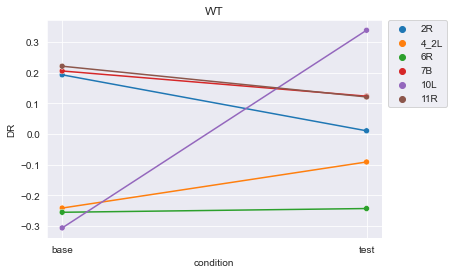

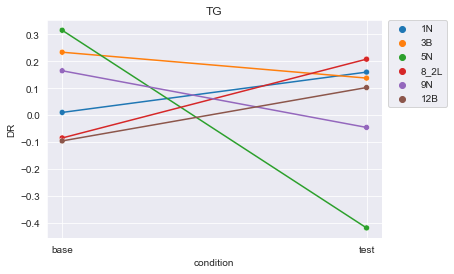

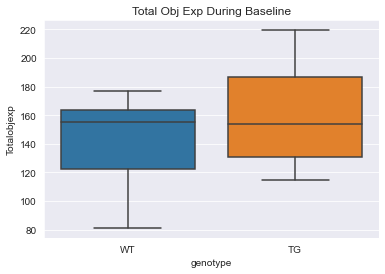

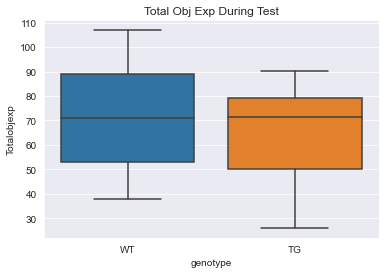

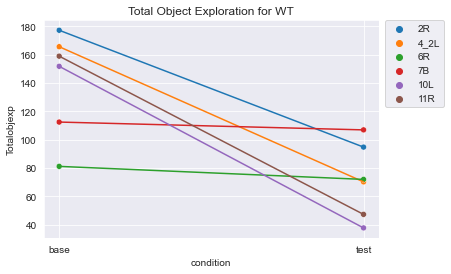

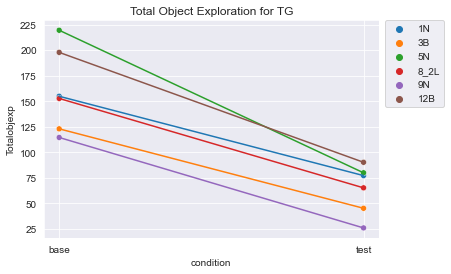

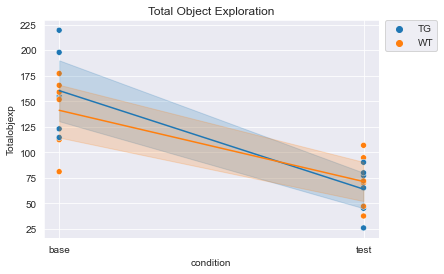

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(0)
sns.set_style("darkgrid")
cohort1_wt = cohort1.loc[np.where(cohort1.genotype == 'WT')[0]].reset_index()
ax = sns.scatterplot(x= "condition", y = "DR", hue = "subid", data = cohort1_wt).set(title = 'WT')
ax1 = sns.lineplot(x = "condition", y = "DR", hue = "subid", legend = False, data = cohort1_wt)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.figure(1)
cohort1_tg = cohort1.loc[np.where(cohort1.genotype == 'TG')[0]].reset_index()
ax = sns.scatterplot(x= "condition", y = "DR", hue = "subid", data = cohort1_tg).set(title = 'TG')
ax1 = sns.lineplot(x = "condition", y = "DR", hue = "subid", legend = False, data = cohort1_tg)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.figure(2)
cohort1_base = cohort1.loc[np.where(cohort1.condition == 'base')[0]].reset_index()
ax = sns.boxplot(x = 'genotype', y = 'Totalobjexp', data = cohort1_base, order = ["WT", "TG"]).set(title = 'Total Obj Exp During Baseline')


plt.figure(3)
cohort1_test = cohort1.loc[np.where(cohort1.condition == 'test')[0]].reset_index()
ax = sns.boxplot(x = 'genotype', y = 'Totalobjexp', data = cohort1_test, order = ["WT", "TG"]).set(title = 'Total Obj Exp During Test')

plt.figure(4)
ax = sns.scatterplot(x= "condition", y = "Totalobjexp", hue = "subid", data = cohort1_wt).set(title = 'Total Object Exploration for WT')
ax1 = sns.lineplot(x = "condition", y = "Totalobjexp", hue = "subid", legend = False, data = cohort1_wt)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.figure(5)
ax = sns.scatterplot(x= "condition", y = "Totalobjexp", hue = "subid", data = cohort1_tg).set(title = 'Total Object Exploration for TG')
ax1 = sns.lineplot(x = "condition", y = "Totalobjexp", hue = "subid", legend = False, data = cohort1_tg)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.figure(6)
ax = sns.scatterplot(x= "condition", y = "Totalobjexp", hue = "genotype", data = cohort1).set(title = 'Total Object Exploration')
ax1 = sns.lineplot(x = "condition", y = "Totalobjexp", hue = "genotype", legend = False, data = cohort1)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

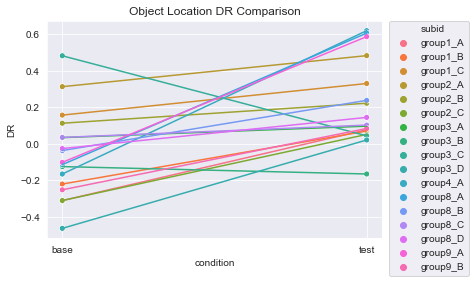

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
ax = sns.scatterplot(x= "condition", y = "DR", hue = "subid", data = overallOL).set(title = 'Object Location DR Comparison')
ax1 = sns.lineplot(x = "condition", y = "DR", hue = "subid", legend = False, data = overallOL)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [1]:
overallOL

NameError: name 'overallOL' is not defined

sns.set_style("darkgrid")




ax = sns.scatterplot(x= "condition", y = "DI", hue = "subid", data = overall)
ax1 = sns.lineplot(x = "condition", y = "DI", hue = "subid", legend = False, data = overall)

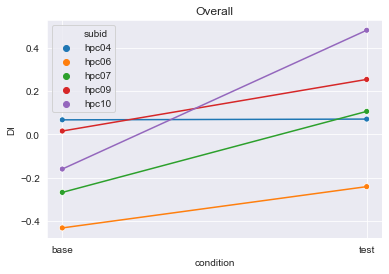

In [5]:
sns.set_style("darkgrid")
ax = sns.scatterplot(x= "condition", y = "DI", hue = "subid", data = overall).set(title = 'Overall')
ax1 = sns.lineplot(x = "condition", y = "DI", hue = "subid", legend = False, data = overall)

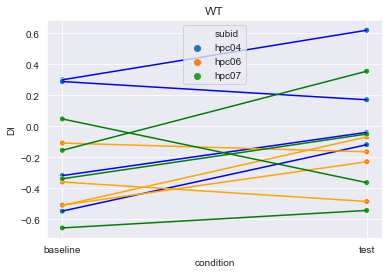

In [6]:
sns.set_style("darkgrid")
WTmeta = metadata.loc[metadata.genotype.str.contains("WT")].reset_index()
ax2 = sns.scatterplot(x = "condition", y = "DI", hue= "subid", data = WTmeta).set(title = 'WT')

def getlines(x, y, color):
    for j in range(0, len(x), 2):
        plt.plot(x[j:j+2], y[j:j+2], color = color)

x = WTmeta.condition.loc[np.where(WTmeta.subid.str.contains('hpc04'))]
y = WTmeta.DI.loc[np.where(WTmeta.subid.str.contains('hpc04'))]
getlines(x, y, 'blue')

x = WTmeta.condition.loc[np.where(WTmeta.subid.str.contains('hpc06'))]
y = WTmeta.DI.loc[np.where(WTmeta.subid.str.contains('hpc06'))]
getlines(x, y, 'orange')

x = WTmeta.condition.loc[np.where(WTmeta.subid.str.contains('hpc07'))]
y = WTmeta.DI.loc[np.where(WTmeta.subid.str.contains('hpc07'))]
getlines(x, y, 'green')

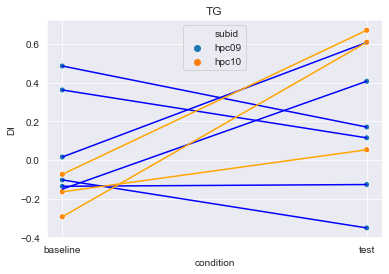

In [9]:
TGmeta = metadata.loc[(metadata.subid.str.contains('hpc09')) | (metadata.subid.str.contains('hpc10'))].reset_index()
ax4 = sns.scatterplot(x = "condition", y = "DI", hue= "subid", data = TGmeta).set(title = 'TG')

x = TGmeta.condition.loc[np.where(TGmeta.subid.str.contains('hpc09'))]
y = TGmeta.DI.loc[np.where(TGmeta.subid.str.contains('hpc09'))]
getlines(x, y, 'blue')

x = TGmeta.condition.loc[np.where(TGmeta.subid.str.contains('hpc10'))]
y = TGmeta.DI.loc[np.where(TGmeta.subid.str.contains('hpc10'))]
getlines(x, y, 'orange')

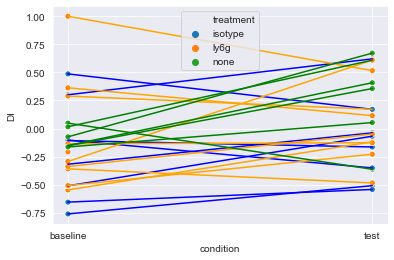

In [10]:
ax5 = sns.scatterplot(x = "condition", y = "DI", hue= "treatment", data = metadata)

x = metadata.condition.loc[np.where(metadata.treatment.str.contains('isotype'))]
y = metadata.DI.loc[np.where(metadata.treatment.str.contains('isotype'))]
getlines(x, y, 'blue')

x = metadata.condition.loc[np.where(metadata.treatment.str.contains('ly6g'))]
y = metadata.DI.loc[np.where(metadata.treatment.str.contains('ly6g'))]
getlines(x, y, 'orange')

x = metadata.condition.loc[np.where(metadata.treatment.str.contains('none'))]
y = metadata.DI.loc[np.where(metadata.treatment.str.contains('none'))]
getlines(x, y, 'green')

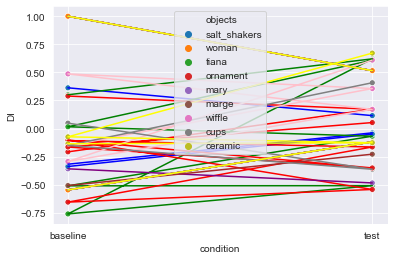

In [11]:
ax6 = sns.scatterplot(x = "condition", y = "DI", hue= "objects", data = metadata)
x = metadata.condition.loc[np.where(metadata.objects.str.contains('salt_shakers'))]
y = metadata.DI.loc[np.where(metadata.objects.str.contains('salt_shakers'))]
getlines(x, y, 'blue')
x = metadata.condition.loc[np.where(metadata.objects.str.contains('woman'))]
y = metadata.DI.loc[np.where(metadata.objects.str.contains('woman'))]
getlines(x, y, 'orange')
plt.plot(metadata.condition.loc[np.where(metadata.objects.str.contains('tiana'))],
         metadata.DI.loc[np.where(metadata.objects.str.contains('tiana'))], color = 'green')
getlines(x, y, 'green')
plt.plot(metadata.condition.loc[np.where(metadata.objects.str.contains('ornament'))],
         metadata.DI.loc[np.where(metadata.objects.str.contains('ornament'))], color = 'red')
getlines(x, y, 'red')
plt.plot(metadata.condition.loc[np.where(metadata.objects.str.contains('mary'))],
         metadata.DI.loc[np.where(metadata.objects.str.contains('mary'))], color = 'purple')
getlines(x, y, 'purple')
plt.plot(metadata.condition.loc[np.where(metadata.objects.str.contains('marge'))],
         metadata.DI.loc[np.where(metadata.objects.str.contains('marge'))], color = 'brown')
getlines(x, y, 'brown')
plt.plot(metadata.condition.loc[np.where(metadata.objects.str.contains('wiffle'))],
         metadata.DI.loc[np.where(metadata.objects.str.contains('wiffle'))], color = 'pink')
getlines(x, y, 'pink')
plt.plot(metadata.condition.loc[np.where(metadata.objects.str.contains('cups'))],
         metadata.DI.loc[np.where(metadata.objects.str.contains('cups'))], color = 'grey')
getlines(x, y, 'grey')
plt.plot(metadata.condition.loc[np.where(metadata.objects.str.contains('ceramic'))],
         metadata.DI.loc[np.where(metadata.objects.str.contains('ceramic'))], color = 'yellow')
getlines(x, y, 'yellow')

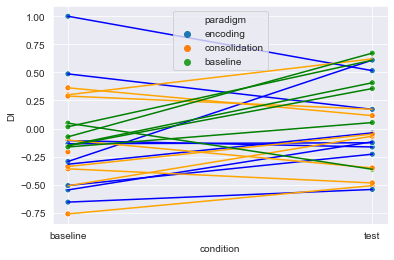

In [12]:
ax7 = sns.scatterplot(x = "condition", y = "DI", hue= "paradigm", data = metadata)

x = metadata.condition.loc[np.where(metadata.paradigm.str.contains('encoding'))]
y = metadata.DI.loc[np.where(metadata.paradigm.str.contains('encoding'))]
getlines(x, y, 'blue')

x = metadata.condition.loc[np.where(metadata.paradigm.str.contains('consolidation'))]
y = metadata.DI.loc[np.where(metadata.paradigm.str.contains('consolidation'))]
getlines(x, y, 'orange')

x = metadata.condition.loc[np.where(metadata.paradigm.str.contains('baseline'))]
y = metadata.DI.loc[np.where(metadata.paradigm.str.contains('baseline'))]
getlines(x, y, 'green')

In [36]:
hpc09 = object_location.loc[np.where(object_location.subid.str.contains('hpc09'))]
sorted(set(hpc09.vidname))




['hpc09_OFbase1_dayxx-05242022130207',
 'hpc09_OFbase_dayxx-06102022141701',
 'hpc09_OFbase_dayxx-06142022135855',
 'hpc09_OFbase_dayxx-06222022133536',
 'hpc09_OFtest_day29-06062022145849',
 'hpc09_OFtest_day45-06222022171658',
 'hpc09_OFtest_dayxx-06102022180703',
 'hpc09_OFtest_dayxx-06142022174847',
 'hpc09_OLbase_day29-06062022110249',
 'hpc09_OLbase_dayxx-05282022143413',
 'hpc09_OLbase_dayxx-07122022140757',
 'hpc09_OLtest1_dayxx-05242022165621',
 'hpc09_OLtest_dayxx-05282022183004']